# Predator-prey models

Here we describe and solve a model of the interaction between a predator and its prey, roughly following the Rosenzweig-MacArthur predator prey model:

*Rosenzweig, M. L. and R. H. MacArthur (1963). "Graphical representation and stability conditions of predator-prey interactions." The American Naturalist 97:209-223.*

The model describes the dynamics of a predator $P$ and its prey $N$, using the following differential equations:

$$
\begin{aligned}
\frac{dN}{dt}&= r(1-\frac{N}{K})N -c_{max} \frac{N}{N +k_{N}}P \\
\frac{dP}{dt}&= e c_{max} \frac{N}{N +k_{N}}P - mP
\end{aligned}
$$

Here, $r$ is the prey maximal growth rate, $K$ is the prey's carrying capcity, $c_{max}$ is the maximal predation rate, $k_{N}$ is the prey population density at which predation is half maximal, $e$ is the predator's population increase for every unit of prey consumed, and $m$m is the predators natural mortality rate.  

Note that the model uses a Holling type 2 functional response, in which the predator conumption rate increases with prey density, but levels off to a maximum because the predator is saturated when intake gets really high, or because the handling and consumption (rather then the catching) of the prey takes all the predator's time. See Buzz Holling's paper:

*Holling, C. S. (1959). "The components of predation as revealed by a study of small-mammal predation of the European pine sawfly". The Canadian Entomologist 91:293–320.*

For a good explanation see: https://en.wikipedia.org/wiki/Functional_response

We don't follow Buzz's precise formulation, but something that is mathematically equivalent to it.  
Below follows a Python implementation.

### Importing some packages

In [2]:
%matplotlib inline
import numpy as np  
import matplotlib.pyplot as plt

### Model parameters

In [3]:
K      = 100.0        # 20   - Prey carrying capacity 
r      = 0.2          # 0.2  - Prey intrinsic growth rate

Cmax   = 1            # 1    - Maximal consumption rate of the predator
k_N    = 30           # 30   - Half saturation constant of Predator for Prey
e      = 0.2          # 0.2  - Predator assimilation coefficient
m      = 0.1          # 31   - Predator mortality rate

### Simulation settings

In [4]:
EndTime= 250          # The length of the simulation (arbitrary unit)
dt     = 0.5          # The time step of the simulation, determines accuracy

### Model definition

In [5]:
def dN_dt(N,P):  # The prey differential equation
    return r*N*(1-N/K) - Cmax*N/(k_N+N)*P

def dP_dt(N,P):  # The predator differential equation
    return e*Cmax*N/(k_N+N)*P - m*P

### Initial states

In [6]:
N = np.zeros(int(EndTime/dt)+1)  # A 1D array to contain the prey population at each time step
P = np.zeros(int(EndTime/dt)+1)  # A 1D array to contain the predator population at each time step
N[0] = K               # The prey's initial value, at carrying capacity
P[0] = 10.0            # The predator initial value

### The main simulation loop

In [7]:
for i in range(int(EndTime/dt)): 
    N[i+1] = N[i] + dt*dN_dt(N[i],P[i])
    P[i+1] = P[i] + dt*dP_dt(N[i],P[i])

### Plotting the results

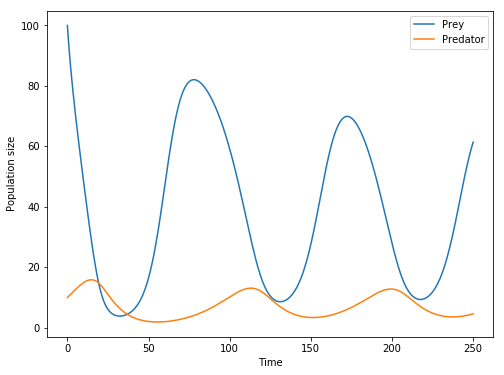

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(np.linspace(0,EndTime,len(N)),N, label=f'Prey')
ax.plot(np.linspace(0,EndTime,len(P)),P, label=f'Predator')
ax.legend()
a=plt.xlabel('Time')
b=plt.ylabel('Population size')

### A simple phase plane plot
To plot the isoclines in a phase plane plot, we have to define the values of *N* and *P* where *dN/dt* and *dP/dt* are zero. For the prey isocline, this is a curve that we can define as a function:

In [9]:
def Peq(N): return r*(1-N/K)*(N+k_N)/Cmax

For the predator isocline, this is defined as a vertical line, as there is a single values of *N* where the predator is in equilibrium:

In [10]:
Neq = (m*k_N/(e*Cmax-m))

Now we start with some graphics settings:

In [11]:
Pmax = 20
Nmax = K*1.1

And then, we can make the phase plane plot:

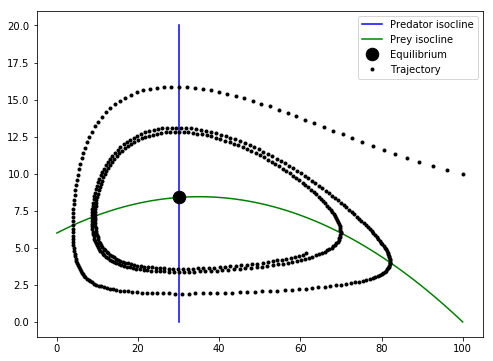

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

f=ax.plot( [Neq, Neq],[0, Pmax],'b-', label=f'Predator isocline' )
f=ax.plot( np.linspace(0,K,100),Peq(np.linspace(0,K,100)),'g-', label=f'Prey isocline' )
f=ax.plot( Neq,Peq(Neq),'k.', markersize=25, label=f'Equilibrium')
f=ax.plot( N,P, 'k.', label=f'Trajectory' )
f=ax.legend()

### A phase plane with isoclines and arrows indicating direction of change.

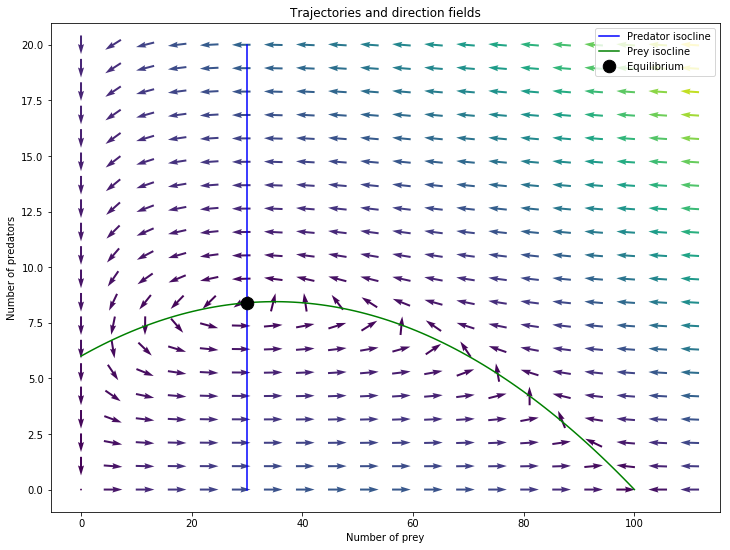

In [13]:
Pi, Ni = np.mgrid[0:20:20j, 0:(K*1.1):20j]
U = dN_dt(Ni,Pi)
V = dP_dt(Ni,Pi)

fig, ax = plt.subplots(1, 1, figsize=(12, 9))

S = np.sqrt(U*U+V*V)
M = (np.hypot(U, V))                        # Norm of the growth rate 
M[ M == 0] = 1.                             # Avoid zero division errors 
U = U/M                                     # Normalize each arrows
V = V/M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
f=ax.set_title('Trajectories and direction fields')
f=ax.quiver(Ni, Pi, U, V, S, pivot='mid')
f=ax.set_xlabel('Number of prey')
f=ax.set_ylabel('Number of predators')

f=ax.plot( [Neq, Neq],[0, Pmax],'b-', label=f'Predator isocline' )
f=ax.plot( np.linspace(0,K,100),Peq(np.linspace(0,K,100)),'g-', label=f'Prey isocline' )
f=ax.plot( Neq,Peq(Neq),'k.', markersize=25, label=f'Equilibrium')

f=plt.legend()

### A phase plane plot with streamlines  
To plot the isoclines in a phase plane plot, we have to define the values of *N* and *P* where *dN/dt* and *dP/dt* are zero.

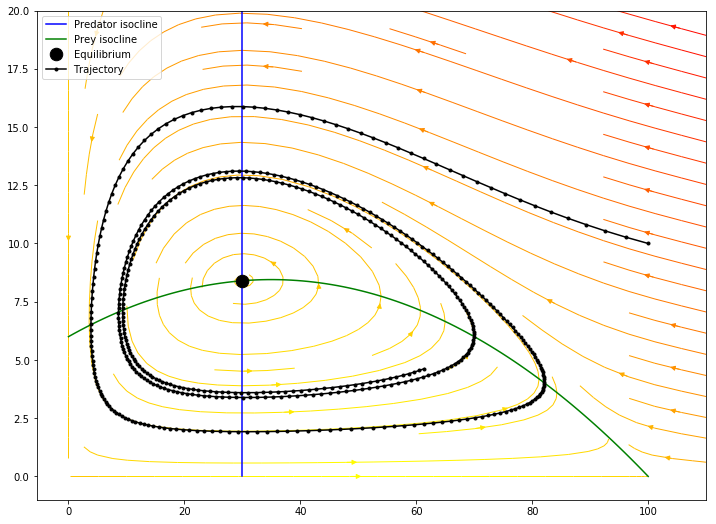

In [16]:
Pi, Ni = np.mgrid[0:20:20j, 0:(K*1.1):20j]
U = dN_dt(Ni,Pi)
V = dP_dt(Ni,Pi)

fig, ax = plt.subplots(1, 1, figsize=(12, 9))

ax.streamplot(Ni, Pi, U, V, density=0.8, 
                color=U, linewidth=1, cmap='autumn')

ax.plot( [Neq, Neq],[0, Pmax],'b-', label=f'Predator isocline' )
ax.plot( np.linspace(0,K,100),Peq(np.linspace(0,K,100)),'g-', label=f'Prey isocline' )
ax.plot( Neq,Peq(Neq),'k.', markersize=25, label=f'Equilibrium' )
ax.plot( N,P, 'k.-', label=f'Trajectory' )
ax.legend(loc='upper left');


Copyright Johan van de Koppel, 2018